In [1]:
from pymemcache.client import base
import json
import matplotlib.pyplot as plt
import numpy as np

In [2]:
base_client = base.Client(("localhost", 11211))

In [3]:
def get_stream_data(num):
    current_str = base_client.get("current")
    current = (int(current_str))
    ret = []
    for i in range(current-num,current):
        ret.append(json.loads(base_client.get(f"{i}")))
    return ret
    

In [23]:
the_data = get_stream_data(500)


In [14]:
def get_fft(signal_data, from_idx, to_idx, xyz ='x'):
    # get the time step by reading the microsecs in timestamp
    from_usecs = float(signal_data[from_idx]['time'].split("-")[2])
    next_usecs = float(signal_data[from_idx+1]['time'].split("-")[2])
    dt=(next_usecs - from_usecs)/1e6
    n=to_idx - from_idx
    signal = [i[xyz] for i in signal_data[from_idx:to_idx]]
    fhat = np.fft.fft(signal, n) #computes the fft
    psd = fhat * np.conj(fhat)/n
    freq = (1/(dt*n)) * np.arange(n) #frequency array
    
    return {"horiz":freq,"vert":psd}

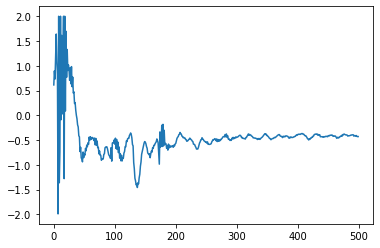

In [25]:
fig, ax = plt.subplots(1)
ax.plot([i for i in range(0,500)],[i['z'] for i in the_data])

In [26]:
the_plot_data = get_fft(the_data,50,200,xyz="z")

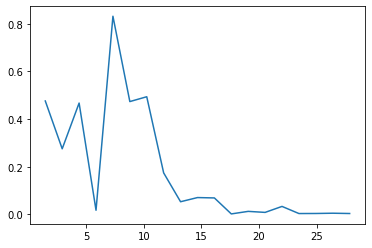

In [27]:
fig, ax = plt.subplots(1)
ax.plot(the_plot_data['horiz'][1:20],the_plot_data['vert'][1:20])

In [21]:
print(the_plot_data['horiz'][1],the_plot_data['vert'][1])

0.9224411482547412 (0.6190684612457081+0j)


In [22]:
print(the_plot_data['horiz'][0],the_plot_data['vert'][0])

0.0 (0.20212103525797526+0j)
